# PCA applicata alle immagini: Eigenbackground

## Import librerie e set parametri

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from skimage.io import imread
from skimage.color import rgb2gray
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd


N_IMG = 15
N_SKIP = 70

## Caricamento e visualizzazione del dataset
Le prime `N_IMG` immagini di HighwayI 

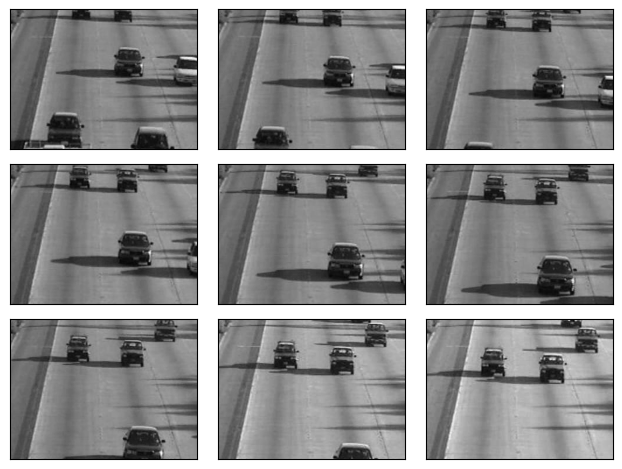

In [2]:
p = Path('data/HighwayI')
im_arr = []
g = p.glob('*.png')

# Preparazione dei subplot
sp_rows = 3
sp_cols = 3
fig = plt.figure()
axes = [fig.add_subplot(sp_rows, sp_cols, r * sp_cols + c + 1) for r in range(0, sp_rows) for c in range(0, sp_cols)]

for idx, fn in enumerate(g):
    if idx < N_IMG:
        im = rgb2gray(imread(fn))
        if idx < sp_rows*sp_cols:
            ax = axes[idx]
            ax.imshow(im, cmap='gray')
            ax.set_xticks([])
            ax.set_yticks([])
        im_arr.append(np.ravel(im))
    else:
        height, width = im.shape
        break

fig.tight_layout() 
plt.show()

## ... anche dal punto di vista numerico!

In [3]:
print(f'Caricate {N_IMG} immagini di dimensioni ({width} x {height}) = {width*height} pixel')
pd.DataFrame(im_arr)

Caricate 9 immagini di dimensioni (320 x 240) = 76800 pixel


,0,1,2,3,4,5,6,7,8,9,...,76790,76791,76792,76793,76794,76795,76796,76797,76798,76799
0,0.037972,0.402075,0.510198,0.443248,0.517758,0.517193,0.433158,0.456687,0.421393,0.413550,...,0.553975,0.542210,0.538289,0.538289,0.538289,0.542210,0.550053,0.557896,0.565740,0.569661
1,0.057833,0.390564,0.524998,0.454410,0.456359,0.472045,0.447951,0.463637,0.423037,0.393920,...,0.541905,0.541905,0.541905,0.541905,0.541905,0.541905,0.541905,0.541905,0.541905,0.541905
2,0.047749,0.381329,0.523606,0.452735,0.456925,0.467558,0.433931,0.441491,0.434222,0.414614,...,0.542455,0.542455,0.542455,0.538534,0.533779,0.529857,0.529857,0.529857,0.530996,0.534918
3,0.058360,0.380458,0.502026,0.431438,0.447124,0.466732,0.431438,0.439281,0.415752,0.396144,...,0.532089,0.539933,0.532089,0.532089,0.532089,0.532089,0.532089,0.532089,0.532089,0.532089
4,0.032055,0.394180,0.498358,0.418245,0.475096,0.482656,0.416258,0.467238,0.445681,0.413475,...,0.545826,0.553669,0.545826,0.545826,0.537983,0.534062,0.526218,0.518375,0.514454,0.514454
5,0.058971,0.391702,0.533712,0.458637,0.462826,0.478513,0.450473,0.466160,0.434787,0.402581,...,0.194106,0.194106,0.194106,0.194106,0.190185,0.186263,0.186263,0.182342,0.178420,0.178420
6,0.046083,0.382453,0.516054,0.468429,0.509312,0.489138,0.418245,0.445696,0.398637,0.404813,...,0.552025,0.555947,0.555947,0.552025,0.549243,0.537478,0.529635,0.517870,0.513949,0.510027
7,0.058971,0.360895,0.507943,0.490575,0.507645,0.484116,0.420500,0.428343,0.459715,0.438158,...,0.516731,0.516731,0.512810,0.516731,0.525713,0.533556,0.541400,0.549243,0.557086,0.561007
8,0.047749,0.389172,0.502332,0.418580,0.453874,0.468995,0.429214,0.464508,0.409606,0.417449,...,0.536339,0.536339,0.532418,0.532418,0.528496,0.528496,0.528496,0.532418,0.536339,0.536339


## Preparazione dei dati ed esecuzione della PCA

In [4]:
X = np.vstack(im_arr)
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

for i, elem in enumerate(pca.explained_variance_ratio_):
    print(f'Componente PC{i+1}: varianza percentuale: {elem*100:.2f} %')
print(f'TOTALE: {np.sum(pca.explained_variance_ratio_)*100:.2f} %')

Componente PC1: varianza percentuale: 23.65 %
Componente PC2: varianza percentuale: 21.14 %
Componente PC3: varianza percentuale: 14.26 %
TOTALE: 59.05 %


## Caricamento di una immagine di test

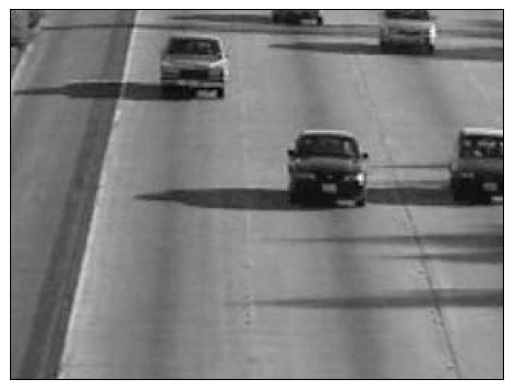

In [5]:
for i in range(N_SKIP):
    fn = next(g)

im = np.ravel(rgb2gray(imread(fn)))

fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(im.reshape(height, width), cmap='gray')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

## Osserviamo cosa succede nel momento in cui trasformiamo e antitrasformiamo l'immagine di test

a) nel caso della PCA su variabili standardizzate

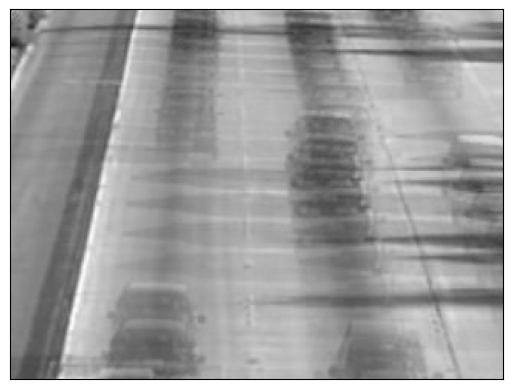

In [6]:
y = pca.transform(im.reshape(1,-1))
Xinv = pca.inverse_transform(y)

fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(Xinv.reshape(height, width), cmap='gray')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

b) nel caso della PCA su variabili centrate ma non scalate

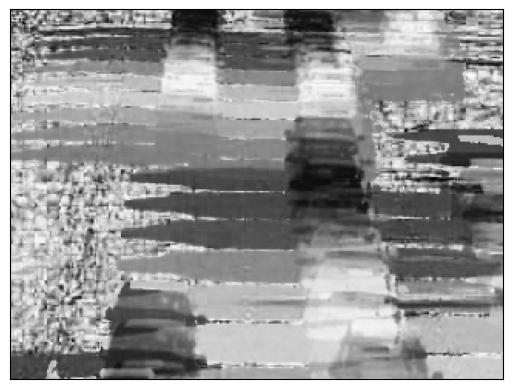

In [7]:
pca.fit(X_scaled)
y = pca.transform(im.reshape(1,-1))
X_scaled_inv = pca.inverse_transform(y)

fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(X_scaled_inv.reshape(height, width), cmap='gray')
ax.set_xticks([])
ax.set_yticks([])
plt.show()